<h1><center>Challenges in Neural Network Optimization</center></h1>
<center>Author: <b>Umang Tiwari </b></center>
<p>In this notebook we see some of the challenges faced in optimization of Neural Networks<p>
<p> We have used the Keras library in order to create the demonstration neural net in this notebook. The NN architecture has 2 hidden layers, 1 input neuron and 1 output neuron. Each hidden layer consists of 16 neurons <p>
    
<p> The challenges that we have covered in this notebook are:</p>
<ul>
    <li>Local Minima</li>
    <li>Saddle Point</li>
    <li>Vanishing Gradients</li>
    <li>Learning rate</li>
    </ul>


<h3>Optimization of Neural Network</h3>
<p> A quick Google Search on the internet tells us that "The process of minimizing (or maximizing) any mathematical expression is called optimization". In our context, pertaining to neural networks, optimization is nothing but changing the weights, learning rates and other associated parameters to decrease the losses and make our network more accuarate.</p>

<p>In this notebook, we condense the optimization in Neural Networks and other Machine Learning techniques into two simple categories:</p>
<ul>
    <li>Convex Optimization</li>
    <li>Non-Convex Optimization</li>
    </ul>
    


In [410]:
%matplotlib notebook

import seaborn as sns
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import timeit

<h3>Convex Optimization</h3>
<p>Convex optimization involves a function in which there is only one optimum, corresponding to the global optimum (maximum or minimum). There is no concept of local optima for convex optimization problems, making them relatively easy to solve</p>

<p>Because there is a single minimum point in a Convex function, the optimization task is relatively simple because we have a single optimum point in the entire function contour. This makes it very easy for algorithms like Stochastic Gradient Descent to minimize the loss function</p>

<p>The below convex function is \[f(xy)=x^2+y^2\]
</p>

<p>We can see the function has a single global minimum at x = 0 and y = 0, and therefore demonstrates how easy it is to go down the slope (Gradient Descent) to reach the minimum in case of a convex function </p>

<IPython.core.display.Javascript object>


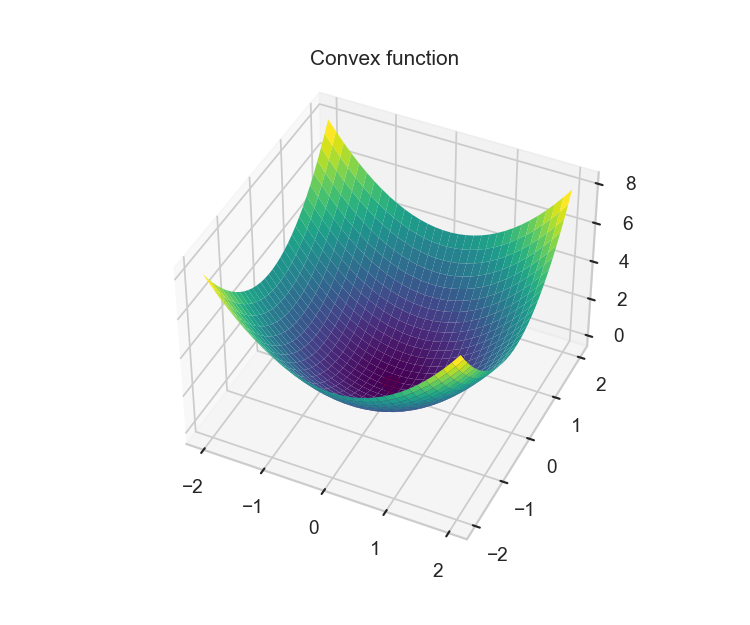

In [411]:
#Convex function

x = np.outer(np.linspace(-2, 2, 32), np.ones(32))
y = x.copy().T # transpose
z = x ** 2 + y ** 2
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection='3d')
x1=0
y1=0
z1=0
#color map
my_cmap = plt.get_cmap('hot')
ax.scatter3D(x1,y1,z1,s=100,color="red")
ax.plot_surface(x, y, z,cmap='viridis', edgecolor='none')
ax.set_title('Convex function')
plt.show()

<h3>Non-Convex Optimization</h3>
<p>When we talk about optimization in the context of neural networks, we are generally discussing non-convex optimization</p>
<p>Non-Convex optimization involves a function which has multiple optima, only one of which is the global optima. Depending on the loss surface, it becomes very difficult in this case to locate the global optimum</p>

<p>The non-convex function used here is:\[f(xy)=sin(x^2)+cos(y^2)\]</p>

<p>From the graph of the function we can see it contains various minimums that are not global optimums and hence, any optimization that reaches the local optimum will cause the system to generate undesirable accuracy. Any optimization task should  guarantee to reach the global optimum so that best accuracy can be achieved</p>

<h4>Local Minima</h4>
<p>One of the challenging tasks of training a neural network is to avoid getting stuck into a Local Minima state. Optimizers like Gradient Descent, use Gradient calculation and Back propagation to find a global optimum state for the network, however when the problem is non-convex in nature the network state has chances of reaching one of the local minima region. This may cause lesser accurate models.</p>

<IPython.core.display.Javascript object>


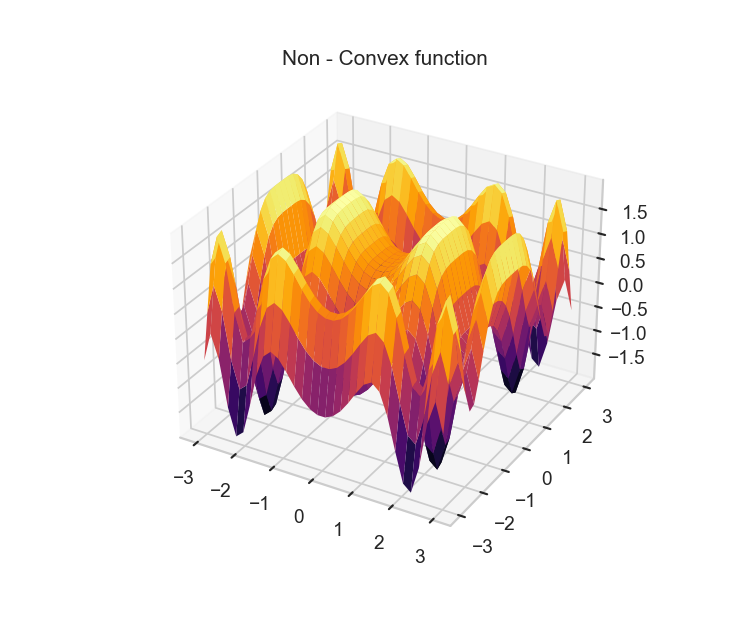

In [412]:
#Non convex
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = np.sin(x**2)+np.cos(y**2)
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection='3d')

#color map
my_cmap = plt.get_cmap('hot')

ax.plot_surface(x, y, z,cmap='inferno', edgecolor='none')
ax.set_title('Non - Convex function')
plt.show()

<h3>Saddle Point</h3>
<p>Researchers have found that when sufficiently large neural networks are used, local minima incur a low cost, i.e. the error is reasonable low and the accuracy is sufficiently high enough for the model to be acceptable. However, studies indicate that in high dimensions, saddle points are more likely than local minima.</p>
<p> A <b>saddle point</b> is a point on the surface of the graph of a function where the slopes (derivatives) in orthogonal directions are all zero (a critical point). This point, however, is neither a minimum nor a maximum, however the zero derivative makes the network behave like it has reached an optimum state. In reality the gradient descent reaches a saddle point, where it results in negligible updates to the network and hence network will cease to train</p>

<p>The example function used here is \[f(xy)=x^2-y^2\] </p>
    
<p> The saddle point of this function is at x = 0 and y = 0 </p>

<IPython.core.display.Javascript object>


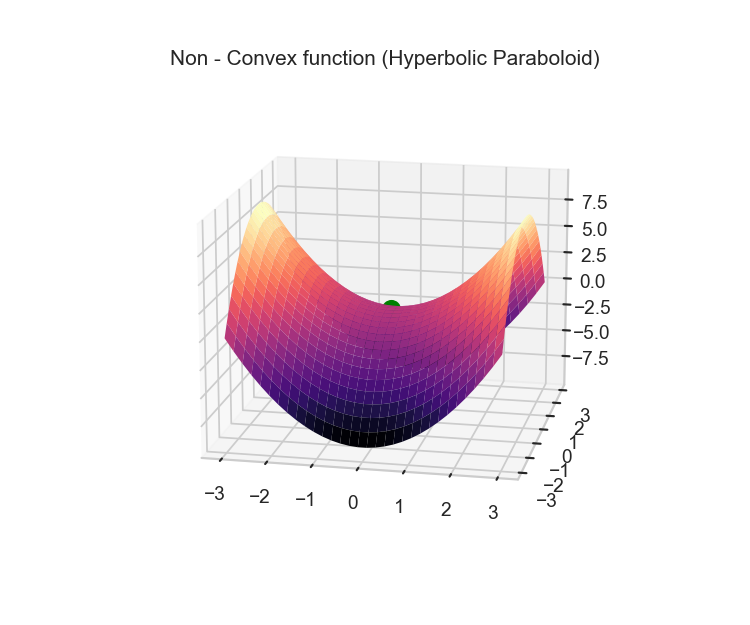

In [413]:
#Non Convex with saddle point

#Hyperbolic paraboloid
z = x**2 - y**2
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(6,5))
ax = plt.axes(projection='3d')

x1 = 0
y1=0
z1=0
#color map
my_cmap = plt.get_cmap('hot')
ax.scatter3D(x1,y1,z1,s=100,color="green")
ax.plot_surface(x, y, z,cmap='magma', edgecolor='none')

ax.set_title('Non - Convex function (Hyperbolic Paraboloid)')
plt.show()


<h3>Vanishing Gradients</h3>
<p>The vanishing gradient problem arises due to the nature of the back-propagation optimization which occurs in neural network training. The weight and bias values in the various layers within a neural network are updated each optimization iteration by stepping in the direction of the gradient of the weight/bias values with respect to the loss function.</p>

<p>The vanishing gradient problem is more evident in deep neural networks. The small gradient affects the region that are farther away from the output layers. Backpropagation changes the weights proportional to the computed gradients, however, when the gradient is very small, the changes at the initial layers of the neural network is diminishing and almost negligible in nature (added effect of learning rate < 1). This makes the network reach a saturated state where the weights are not updated anymore.</p>
    
<h3>Sigmoid Function</h3>
<p>The vanishing gradient problem is particularly problematic with sigmoid activation functions. The plot below shows the sigmoid activation function and its first derivative. As can be observed, when the sigmoid function value is either too high or too low, the derivative (orange line) becomes very small i.e. << 1. This causes vanishing gradients and poor learning for deep networks. This can occur when the weights of our networks are initialized poorly – with too-large negative and positive values. These too-large values saturate the input to the sigmoid and pushes the derivatives into the small valued regions. However, even if the weights are initialized nicely, and the derivatives are sitting around the maximum i.e. ~0.2, with many layers there will still be a vanishing gradient problem. </p>

<IPython.core.display.Javascript object>


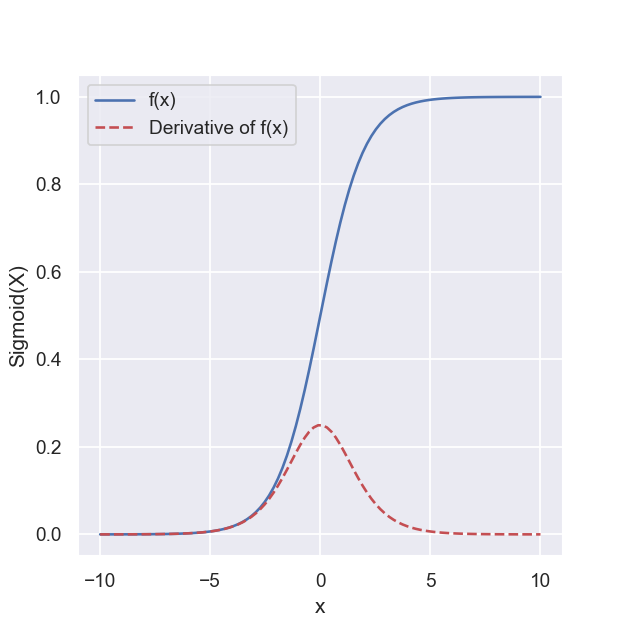

In [414]:
#Sigmoid and derivative of sigmoid
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
sns.set(style = "darkgrid")
fig=plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, label = 'f(x)')

#Plotting derivative
dy_dx = y*(1-y)
ax1.plot(x,dy_dx, '--r', label = 'Derivative of f(x)')
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
ax1.legend()  
plt.show()

<h3>Hyperbolic Tangent Function</h3>
<p>Historically, the tanh function became preferred over the sigmoid function as it gave better performance for multi-layer neural networks. But it did not solve the vanishing gradient problem that sigmoids suffered.</p>

<IPython.core.display.Javascript object>


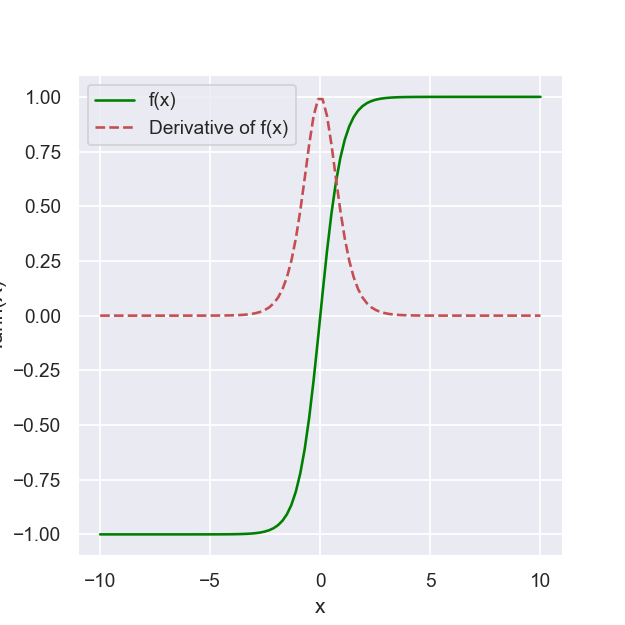

In [415]:
#Tanh and derivative of Tanh
x = np.linspace(-10, 10, 100)
y = np.tanh(x)
sns.set(style = "darkgrid")
fig=plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, label = 'f(x)',color="green")

dy_dx = 1-((np.tanh(x))**2)
ax1.plot(x,dy_dx, '--r', label = 'Derivative of f(x)')
plt.xlabel("x")
plt.ylabel("Tanh(X)")
ax1.legend()  
plt.show()

<IPython.core.display.Javascript object>


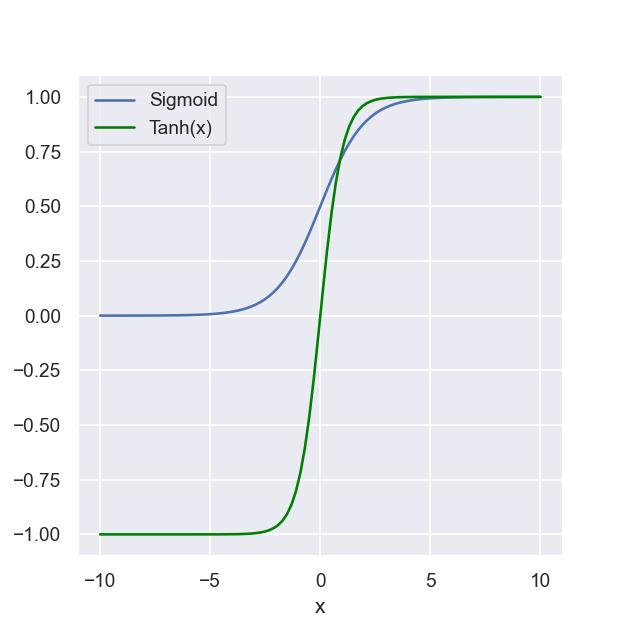

In [416]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
sns.set(style = "darkgrid")
fig=plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, label = 'Sigmoid')

y = np.tanh(x)
ax1.plot(x,y, label = 'Tanh(x)',color="green")
ax1.legend()
plt.xlabel("x")
plt.show()

<h3>Solution to the vanishing gradient problem: Rectified Linear Unit</h3>
<p>As can be observed, the ReLU activation simply returns its argument x whenever it is greater than zero, and returns 0 otherwise. The first derivative of ReLU is also very simple – it is equal to 1 when x is greater than zero, but otherwise it is 0. When it’s derivative is back-propagated there will be no degradation of the error signal as 1 x 1 x 1 x 1… = 1 and hence the network will not reach a saturated state. </p>

<IPython.core.display.Javascript object>


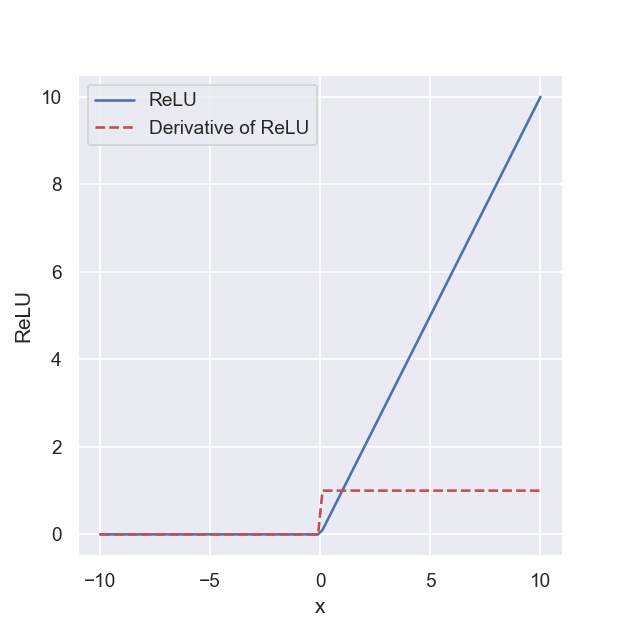

In [417]:
x = np.linspace(-10, 10, 100)
y = np.maximum(x,0)
sns.set(style = "darkgrid")
fig=plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(x,y, label = 'ReLU')

dy_dx = (x>0)*1
ax1.plot(x,dy_dx, '--r', label = 'Derivative of ReLU')
plt.xlabel("x")
plt.ylabel("ReLU")
ax1.legend()  
plt.show()
ax1.legend()
plt.show()

<h3>Learning Rate</h3>
<p>How big the steps are gradient descent takes into the direction of the local minimum are determined by the learning rate, which figures out how fast or slows we will move towards the optimal weights.

For gradient descent to reach the local minimum we must set the learning rate to an appropriate value, which is neither too low nor too high. This is important because if the steps it takes are too big, it may not reach the local minimum because it bounces back and forth between the convex function of gradient descent . If we set the learning rate to a very small value, gradient descent will eventually reach the local minimum but that may take a while</p>

<p>In the following cells we try to demonstrate how too high learning rate and too low learning rate may affect learning </p>

In [418]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
        
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

1 Physical GPUs, 1 Logical GPUs


Max of X is: 99.5
Max of y is: 8915474.43208558
(220, 1)
(220, 1)


<IPython.core.display.Javascript object>


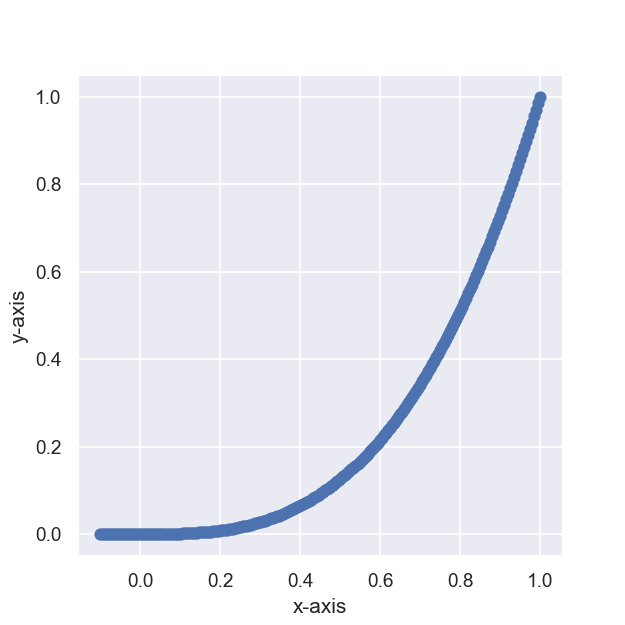

In [419]:
def generate_data():
    X = np.arange(-10,100,0.5)
    y = 9*X**3 + 5*X**2 + np.random.randn(220)*1000
    return X,y

X,y = generate_data()
print("Max of X is:",max(X))
print("Max of y is:",max(y))
X = X/max(X)
y =y/max(y)

X=np.reshape(X,(-1,1))
y=np.reshape(y,(-1,1))
print(X.shape)
print(y.shape)

f=plt.figure()
f.set_figwidth(5)
f.set_figheight(5)



plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.scatter(X,y)
plt.grid(True)
plt.show()


In [420]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(146, 1)
(146, 1)
(74, 1)
(74, 1)


<h3>Neural Network Architecture</h3>
<h6>Fully connected feed forward neural network</h6>
<p>Loss function: <b>Mean Squared Error</b></p>
<p>Optimizer: <b>Stochastic Gradient Descent</b></p>
<p>Activation function: <b>ReLU</b></p>

In [421]:
model = keras.Sequential([
    keras.layers.Dense(16, activation ="relu", input_dim=1),
    keras.layers.Dense(16,activation = "relu",input_dim=16),
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_43 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [422]:
lr_list = [1,0.1,0.01,0.001]
history=[]
for l_rate in lr_list:
    optimizer = keras.optimizers.SGD(lr = l_rate)
    model.compile(loss='mean_squared_error',optimizer=optimizer)
    start_time = timeit.default_timer()
    history.append(model.fit(X_train,y_train,validation_split = 0.33, batch_size=10, epochs=250,verbose=0)) 
    end_time = timeit.default_timer()
    time_taken = end_time - start_time
    acc = model.evaluate(X_test, y_test, verbose=0)
    print("LR:",l_rate,"Error:",acc,"Time Taken:",time_taken)

LR: 1 Error: 247.79322814941406 Time Taken: 11.100024200000917
LR: 0.1 Error: 0.08944080770015717 Time Taken: 10.265048000001116
LR: 0.01 Error: 0.08701770752668381 Time Taken: 10.326288999998724
LR: 0.001 Error: 0.08688575029373169 Time Taken: 10.435623999999734


<h3>Conclusion</h3>
<p>From the above values of learning rates we can see that for Learning rate of 1, the model couldn't converge to an optimum state, i.e. it overshot the global optimum. For Learning rate of 0.01, we see the model is considerable accurate and took the least time. On the other hand, the least learning rate of 0.001 took more time to converge than 0.1 and 0.01 because the steps were very small and gradient update was slower.</p>


<h3>Accuracy</h3>
<p>In the below given plot we can see that for higher learning rate the model tries getting closer to an optimum state but overshoots and reaches a lesser optimum state. The model gets inaccurate and never converges to provide considerable accuracy. On the other hand a perfect learning rate converges significantly quicker and provides a more accurate model </p>

<IPython.core.display.Javascript object>


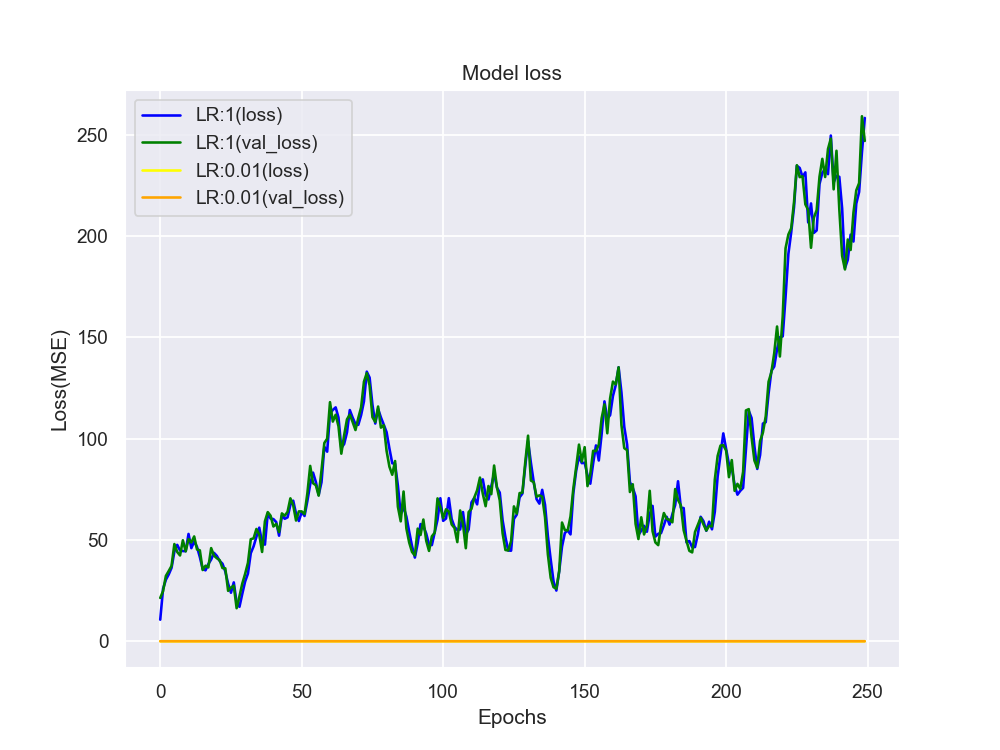

In [428]:
sns.set(style = "darkgrid")
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

#LR:1
ax1.plot(history[0].history['loss'], label="LR:1(loss)",color="blue")
ax1.plot(history[0].history['val_loss'], label="LR:1(val_loss)",color="green")

#lr:0.01
ax1.plot(history[2].history['loss'],label="LR:0.01(loss)",color="yellow")
ax1.plot(history[2].history['val_loss'],label="LR:0.01(val_loss)", color="orange")

plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


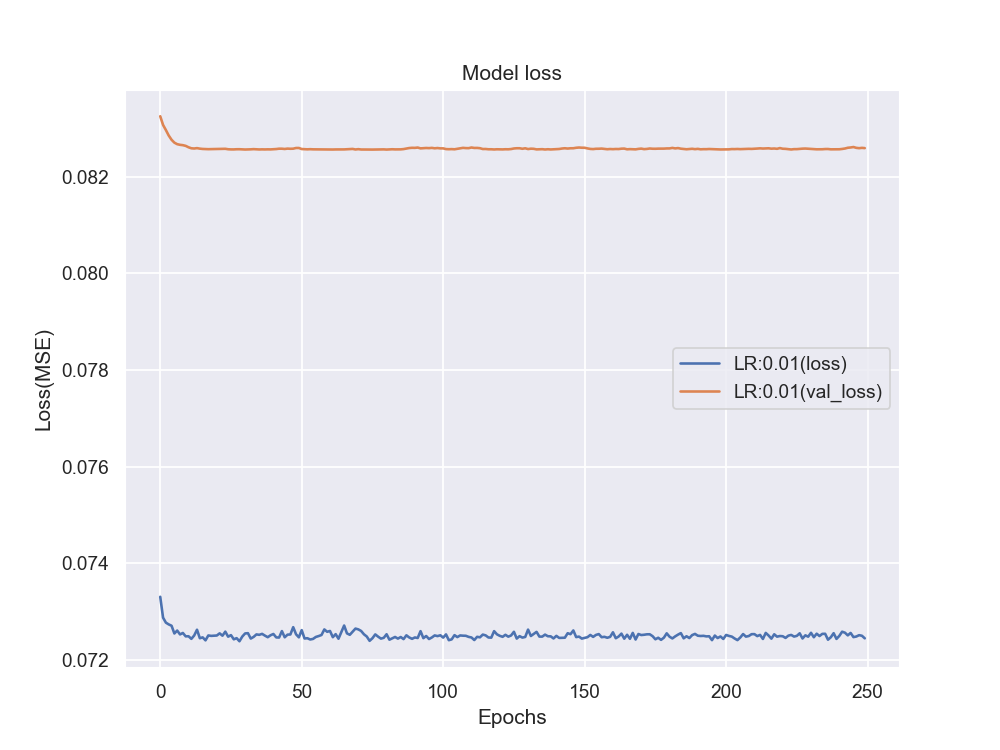

In [427]:
sns.set(style = "darkgrid")
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(history[2].history['loss'],label="LR:0.01(loss)")
ax1.plot(history[2].history['val_loss'],label="LR:0.01(val_loss)")
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')
plt.legend()
plt.grid(True)
plt.show()